In [4]:
######################
# import pacakge
######################
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#get_ipython().run_line_magic('matplotlib', 'ipympl')
#%matplotlib widget
import numpy as np
import os


In [6]:
##########################
#folder definition
##########################

# linux folder path
caenlogfolder = '/home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/'

#windows
#caenlogfolder = 'd:\\data\\kamioka-data\\CAEN_logs\\'

# data processing

In [7]:
def read_line(line, param_dict=None):
    emptyline = 0
    line_s = line.split(' ')
    dateascii = line_s[0][1:-2]
    try:
        date = datetime.strptime(dateascii, '%Y-%m-%dT%H:%M:%S')
    except ValueError:
        return None  # Return None or appropriate default values
    measurement_name = line_s[1][1:-1]
    channel = int(line_s[5][1:-1])
    param = line_s[7][1:-1]
    param_val = line_s[9][1:-2]
    if (param == "Pw" or param == 'ImonRange'):
        if param_val == 'true':
            param_val = 1
        else:
            param_val = 0
    else:
        param_val = float(param_val)
    return [date, channel, param, param_val]

In [8]:
now = datetime.now()
def get_HV_df(filename):
    emptyline = 0
    param_dict_0 = {"date":[now], "channel":[2],"IMon":[0], "VMon":[0],"Pw":[0],"ChStatus":[0],"IMonRange":[0]}
    param_dict_2 = {"date":[now], "channel":[3],"IMon":[0], "VMon":[0],"Pw":[0],"ChStatus":[0],"IMonRange":[0]}
    for dataframe in filename:
        with open(dataframe, 'r') as f:
            lines = f.readlines()
            df = pd.DataFrame()
            for l in lines:
                result = read_line(l)
                if result is None:
                    emptyline += 1
                    continue
                [date, channel, param, param_val] = result 
                if date == 0:
                        print(date)
                if channel == 2:
                    for p in param_dict_0:
                        if p == param:
                            param_dict_0[p].append(param_val)
                            param_dict_2[p].append(param_dict_2[p][-1])
                        elif p == 'date':
                            param_dict_0["date"].append(date)
                            param_dict_2["date"].append(date)
                        elif p == 'channel':
                            param_dict_0["channel"].append(2)
                            param_dict_2["channel"].append(3)
                        else:
                            param_dict_0[p].append(param_dict_0[p][-1])
                            param_dict_2[p].append(param_dict_2[p][-1])
                elif channel == 3:
                    for p in param_dict_2:
                        if p == param:
                            param_dict_2[p].append(param_val)
                            param_dict_0[p].append(param_dict_0[p][-1])
                        elif p == 'date':
                            param_dict_0["date"].append(date)
                            param_dict_2["date"].append(date)
                        elif p == 'channel':
                            param_dict_0["channel"].append(2)
                            param_dict_2["channel"].append(3)
                        else:
                            param_dict_0[p].append(param_dict_0[p][-1])
                            param_dict_2[p].append(param_dict_2[p][-1])    
                    #print(param_dict_0)
                    #print(param_dict_2)
            df_0 = pd.DataFrame.from_dict(param_dict_0)
            df_2 = pd.DataFrame.from_dict(param_dict_2)
            df = df_0
            df= pd.concat([df,df_2], ignore_index=True)
            print(f"The number of empty line in {dataframe} is %i" % emptyline)
            return df

In [9]:
def filter_date(df,d1,d2):
    mask = (df['date'] > d1) & (df['date'] <=d2)
    df_f = df.loc[mask]
    return df_f

# coplanar FEA data

In [6]:
fcaen3 = caenlogfolder + 'CAENGECO2020until240401.log'
fcaen4 = caenlogfolder + 'CAENGECO2020_240401_240403.log'
fcaen1 = caenlogfolder + 'CAENGECO2020-240307-240314.log'
fcaen2 = caenlogfolder + 'CAENGECO2020-240321-240327.log'

FEA1 = 'onlySi'
FEA2 = 'Au'

In [7]:
# this step takes time, be patient
df1 = get_HV_df([fcaen1])
df2 = get_HV_df([fcaen2])
df3 = get_HV_df([fcaen3])
df4 = get_HV_df([fcaen4])

#print(df1.iloc[1:,])
# print(df1.sort_values(by="date").tail())
# print(df2.sort_values(by="date").tail())
# print(df3.sort_values(by="date").tail())

df_unsorted = pd.concat([df1.iloc[:-2,], df2.iloc[:-2,], df3.iloc[:-2,], df4.iloc[:-2,]])

df = df_unsorted.sort_values(by='date').iloc[:-8,]

print(df.iloc[:-8,].tail())
print(df.head())

df1 = df.query("channel==2")
df2 = df.query("channel==3")

The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020-240307-240314.log is 0
The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020-240321-240327.log is 0
The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020until240401.log is 0
The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020_240401_240403.log is 0
                      date  channel     IMon  VMon  Pw  ChStatus  IMonRange
238414 2024-04-03 10:25:33        3  0.00479  1.90   0       0.0          0
119204 2024-04-03 10:25:34        2 -0.00286  1.25   0       0.0          0
238415 2024-04-03 10:25:34        3  0.00480  1.90   0       0.0          0
119205 2024-04-03 10:25:35        2 -0.00286  1.25   0       0.0          0
238416 2024-04-03 10:25:35        3  0.00481  1.90   0       0.0          0
                      date  channel

## plots

### plot of entire experiment period

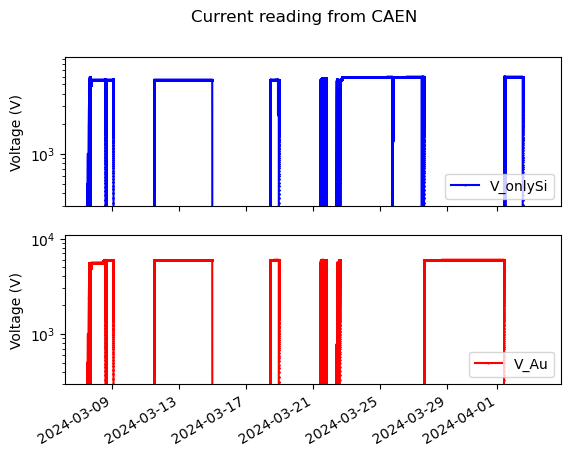

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

ax1.plot_date(df1.date[0:], df1.VMon[0:],'.-',color='blue',  label='V_'+FEA1, markersize=1)
ax2.plot_date(df2.date[0:], df2.VMon[0:],'.-',color='red', label='V_'+FEA2, markersize=1)

fig.suptitle("Current reading from CAEN")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('Voltage (V)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim(300)
ax2.set_ylim(300)
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

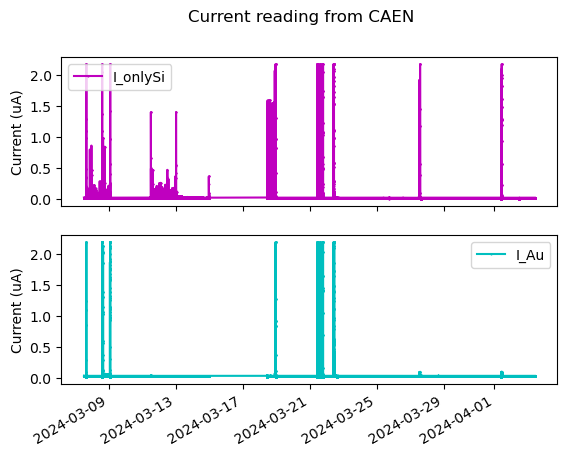

In [9]:
fig, (ax3, ax4) = plt.subplots(2,1, sharex='col')

ax3.plot_date(df1.date[0:], df1.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
ax4.plot_date(df2.date[0:], df2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)

fig.suptitle("Current reading from CAEN")
#ax3.set_title("Subplot title")
ax3.set_ylabel('Current (uA)')
ax4.set_ylabel('Current (uA)')
#ax3.set_yscale('log')
#ax4.set_yscale('log')
#ax3.set_ylim(1e-3, 1e-1)
#ax4.set_ylim(1e-4, 1e-1)
ax3.legend()
ax4.legend()

plt.gcf().autofmt_xdate()

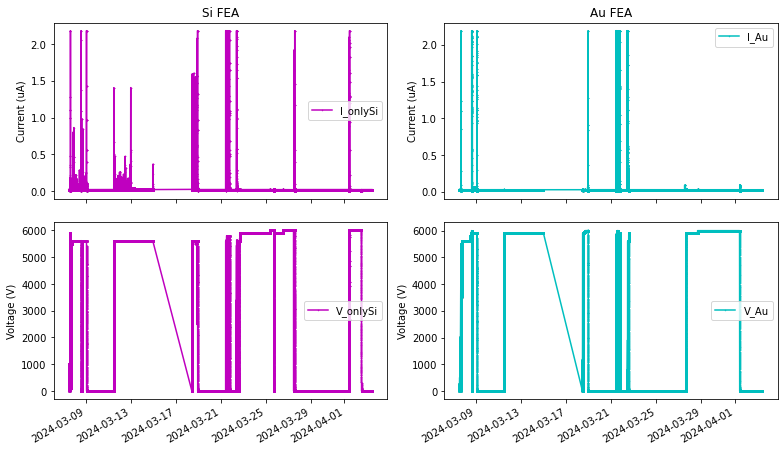

In [11]:
plt.figure(figsize = [11,7])

plt.subplot(2,2,1)
plt.title("Si FEA")
plt.ylabel('Current (uA)')
plt.plot_date(df1.date[0:], df1.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.title("Au FEA")
plt.ylabel('Current (uA)')
plt.plot_date(df2.date[0:], df2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.ylabel('Voltage (V)')
#plt.yscale("log")
plt.plot_date(df1.date[0:], df1.VMon[0:],'.-',color='m',label='V_'+FEA1, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.ylabel('Voltage (V)')
plt.plot_date(df2.date[0:], df2.VMon[0:],'.-',color='c',label='V_'+FEA2, markersize=1)
#plt.yscale("log")
plt.legend(loc='best')

#plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()

# directory = '/home/caio/remote/graphs/FEA_0036-0038'
# filename = 'coplanar_FEA_test'
# path = os.path.join(directory, filename)

# plt.savefig(path, dpi=200, transparent = True, bbox_inches='tight')

# plt.show()

### now a plot filtering the datetime

In [8]:
d1 = datetime(2024, 3, 11, 00, 43, 14)
d2 = datetime(2024, 3, 13, 12, 40, 29)
df_f = filter_date(df,d1,d2)

df_0 = df_f.query("channel==2")
df_2 = df_f.query("channel==3")

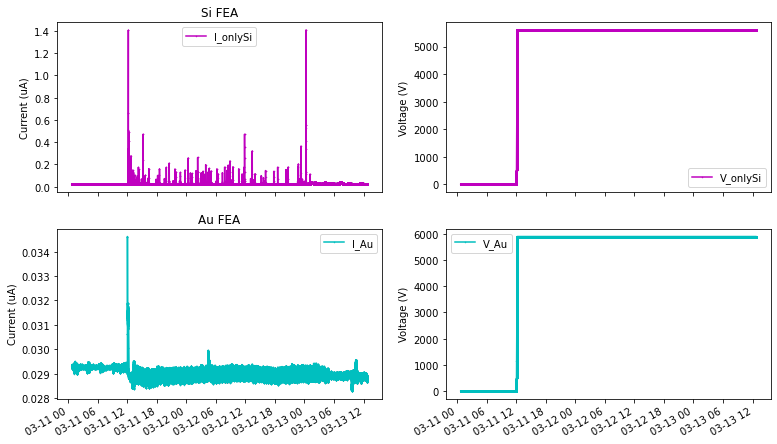

In [9]:
#plt.subplots(2,1, sharex='col')

plt.figure(figsize = [11,7])

plt.subplot(2,2,1)
plt.title("Si FEA")
plt.ylabel('Current (uA)')
plt.plot_date(df_0.date[0:], df_0.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
plt.legend()

plt.subplot(2,2,3)
plt.title("Au FEA")
plt.ylabel('Current (uA)')
plt.plot_date(df_2.date[0:], df_2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)
plt.legend()

plt.subplot(2,2,2)
plt.ylabel('Voltage (V)')
plt.plot_date(df_0.date[0:], df_0.VMon[0:],'.-',color='m',label='V_'+FEA1, markersize=1)
plt.legend()

plt.subplot(2,2,4)
plt.ylabel('Voltage (V)')
plt.plot_date(df_2.date[0:], df_2.VMon[0:],'.-',color='c',label='V_'+FEA2, markersize=1)
plt.legend()

#plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()

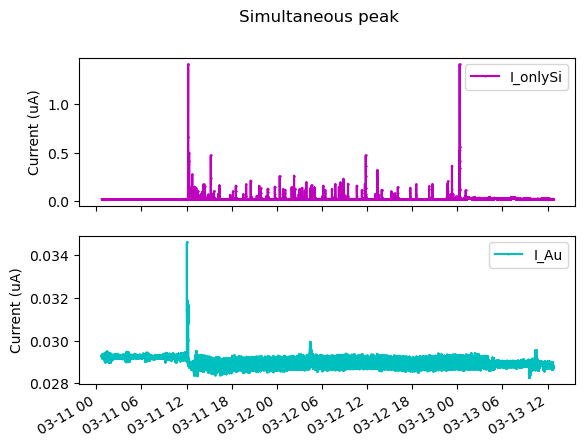

In [13]:
fig, (ax3, ax4) = plt.subplots(2,1, sharex='col')

ax3.plot_date(df_0.date[0:], df_0.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
ax4.plot_date(df_2.date[0:], df_2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)

fig.suptitle("Simultaneous peak")
#ax3.set_title("Subplot title")
ax3.set_ylabel('Current (uA)')
ax4.set_ylabel('Current (uA)')
#ax3.set_yscale('log')
#ax4.set_yscale('log')
#ax3.set_ylim(1e-3, 1e-1)
#ax4.set_ylim(1e-4, 1e-1)
ax3.legend()
ax4.legend()

plt.gcf().autofmt_xdate()

# face-to-face FEA data

In [7]:
fcaen1 = caenlogfolder + 'CAENGECO2020-240424-240513.log'
fcaen2 = caenlogfolder + 'CAENGECO2020-240424.log'
fcaen3 = caenlogfolder + 'CAENGECO2020_until240613_end.log'
fcaen4 = caenlogfolder + 'CAENGECO2020_240501_240516.log'

FEA1='FEA-0036(Si)'
FEA2='FEA-0038(Au)'

In [8]:
# this step takes time, be patient
df1 = get_HV_df([fcaen1])
df2 = get_HV_df([fcaen2])
df3 = get_HV_df([fcaen3])
df4 = get_HV_df([fcaen4])

num_CAENfolder = 4

#print(df1.iloc[1:,])
# print(df1.sort_values(by="date").tail())
# print(df2.sort_values(by="date").tail())
# print(df3.sort_values(by="date").tail())

df_unsorted = pd.concat([df1.iloc[:-2,], df2.iloc[:-2,], df3.iloc[:-2,], df4.iloc[:-2,]])

df = df_unsorted.sort_values(by='date').iloc[:-num_CAENfolder*2,]

print(df.iloc[:-num_CAENfolder*2,].tail())
print(df.head())

df1 = df.query("channel==2")
df2 = df.query("channel==3")

The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020-240424-240513.log is 0
The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020-240424.log is 0
The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020_until240613_end.log is 1658
The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020_240501_240516.log is 0
                       date  channel     IMon  VMon  Pw  ChStatus  IMonRange
3255085 2024-06-13 11:14:55        2 -0.00304   1.6   0       0.0          0
3255086 2024-06-13 11:14:56        2 -0.00303   1.6   0       0.0          0
6510191 2024-06-13 11:14:56        3  0.01158   1.8   0       0.0          0
6510192 2024-06-13 11:14:58        3  0.01158   1.8   0       0.0          0
3255088 2024-06-13 11:14:58        2 -0.00302   1.6   0       0.0          0
                       date 

## plots

### plots of entire experiment period

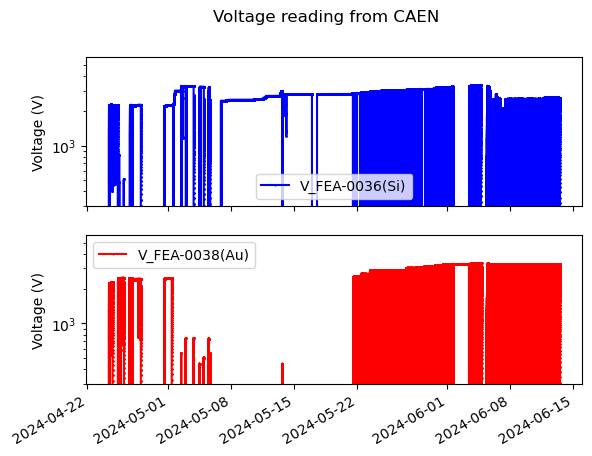

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

ax1.plot_date(df1.date[0:], df1.VMon[0:],'.-',color='blue',  label='V_'+FEA1, markersize=1)
ax2.plot_date(df2.date[0:], df2.VMon[0:],'.-',color='red', label='V_'+FEA2, markersize=1)

fig.suptitle("Voltage reading from CAEN")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('Voltage (V)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim(300)
ax2.set_ylim(300)
ax1.legend(loc='best')
ax2.legend(loc='best')

plt.gcf().autofmt_xdate()

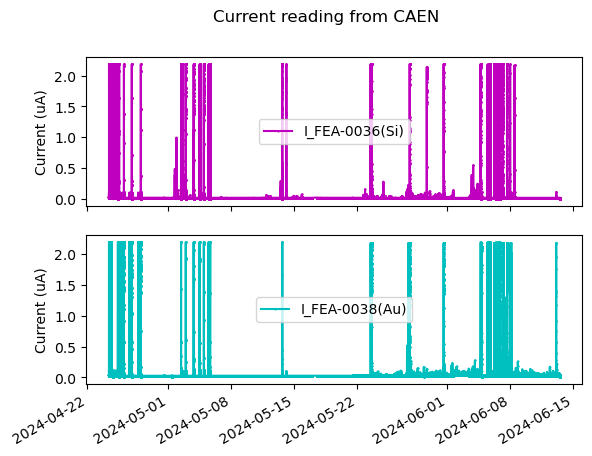

In [10]:
fig, (ax3, ax4) = plt.subplots(2,1, sharex='col')

ax3.plot_date(df1.date[0:], df1.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
ax4.plot_date(df2.date[0:], df2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)

fig.suptitle("Current reading from CAEN")
#ax3.set_title("Subplot title")
ax3.set_ylabel('Current (uA)')
ax4.set_ylabel('Current (uA)')
#ax3.set_yscale('log')
#ax4.set_yscale('log')
#ax3.set_ylim(1e-3, 1e-1)
#ax4.set_ylim(1e-4, 1e-1)
ax3.legend(loc='best')
ax4.legend(loc='best')

plt.gcf().autofmt_xdate()

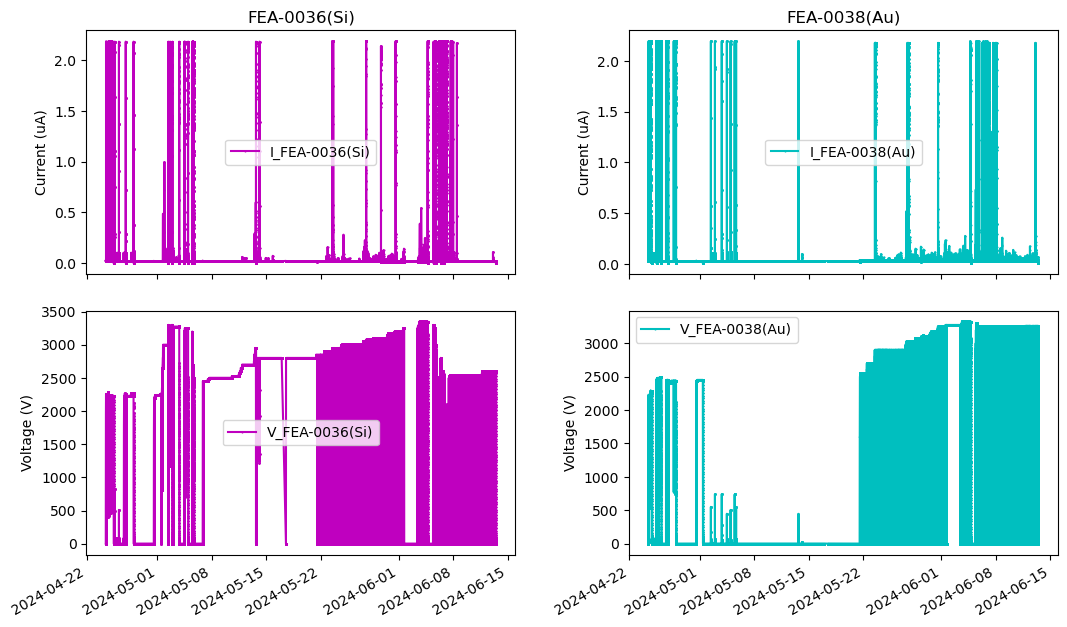

In [11]:
plt.figure(figsize = [11,7])

plt.subplot(2,2,1)
plt.title(f"{FEA1}")
plt.ylabel('Current (uA)')
plt.plot_date(df1.date[0:], df1.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.title(f"{FEA2}")
plt.ylabel('Current (uA)')
plt.plot_date(df2.date[0:], df2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.ylabel('Voltage (V)')
#plt.yscale("log")
plt.plot_date(df1.date[0:], df1.VMon[0:],'.-',color='m',label='V_'+FEA1, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.ylabel('Voltage (V)')
plt.plot_date(df2.date[0:], df2.VMon[0:],'.-',color='c',label='V_'+FEA2, markersize=1)
#plt.yscale("log")
plt.legend(loc='best')

#plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()

directory = '/home/caio/remote/graphs/FEA_0036-0038'
filename = 'after_new-HV_all'
path = os.path.join(directory, filename)

plt.savefig(path, dpi=200, transparent = True)

plt.show()

### now plot filtering data

In [170]:
d1 = datetime(2024, 6, 6, 0, 00, 0)
d2 = datetime(2024, 6, 6, 0, 1, 0)
df_f = filter_date(df,d1,d2)

df_0 = df_f.query("channel==2")
df_2 = df_f.query("channel==3")

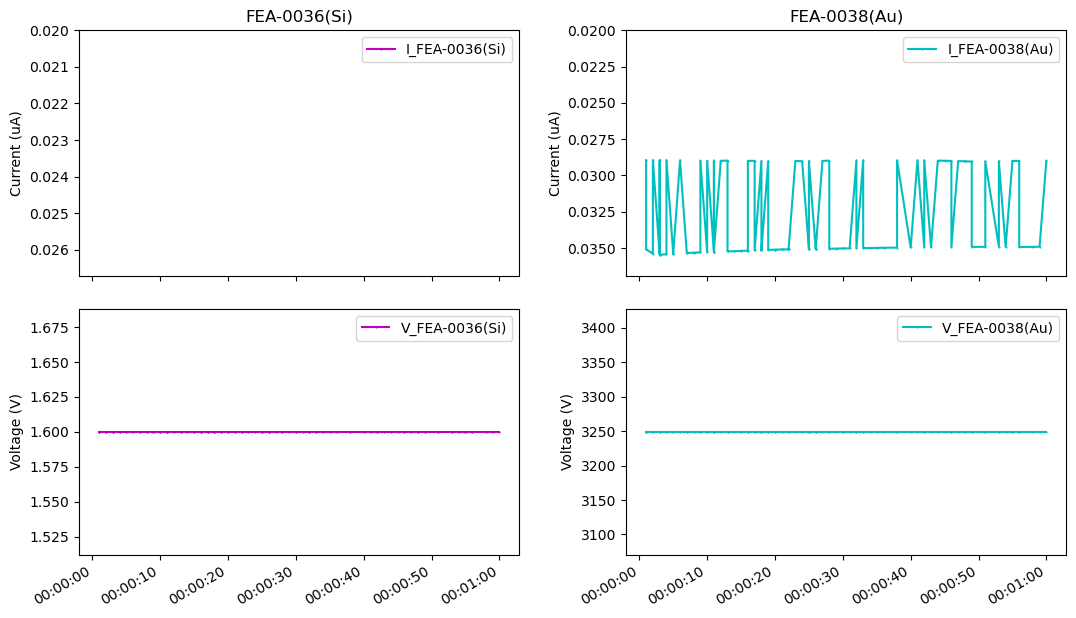

In [171]:
#plt.subplots(2,1, sharex='col')

plt.figure(figsize = [11,7])

plt.subplot(2,2,1)
plt.title(f"{FEA1}")
plt.ylabel('Current (uA)')
plt.plot_date(df_0.date[0:], df_0.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
plt.ylim([np.min(df_0.IMon[0:] - np.min(df.IMon[0:]))+0.008,0.02])
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.title(f"{FEA2}")
plt.ylabel('Current (uA)')
plt.plot_date(df_2.date[0:], df_2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)
plt.ylim([np.min(df_2.IMon[0:] - np.min(df.IMon[0:]))+0.008,0.02])
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.ylabel('Voltage (V)')
plt.plot_date(df_0.date[0:], df_0.VMon[0:],'.-',color='m',label='V_'+FEA1, markersize=1)
#plt.yscale("log")
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.ylabel('Voltage (V)')
plt.plot_date(df_2.date[0:], df_2.VMon[0:],'.-',color='c',label='V_'+FEA2, markersize=1)
#plt.yscale("log")
plt.legend(loc='best')

#plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()

# directory = '/home/caio/remote/graphs/FEA_0036-0038'
# filename = 'before_new-HVsupply'
# path = os.path.join(directory, filename)

# plt.savefig(path, dpi=200, transparent = True, bbox_inches='tight')

# plt.show()

In [156]:
d1 = datetime(2024, 6, 6, 00, 13, 14)
d2 = datetime(2024, 6, 8, 23, 15, 29)
df_f = filter_date(df,d1,d2)

df_0 = df_f.query("channel==2")
df_2 = df_f.query("channel==3")

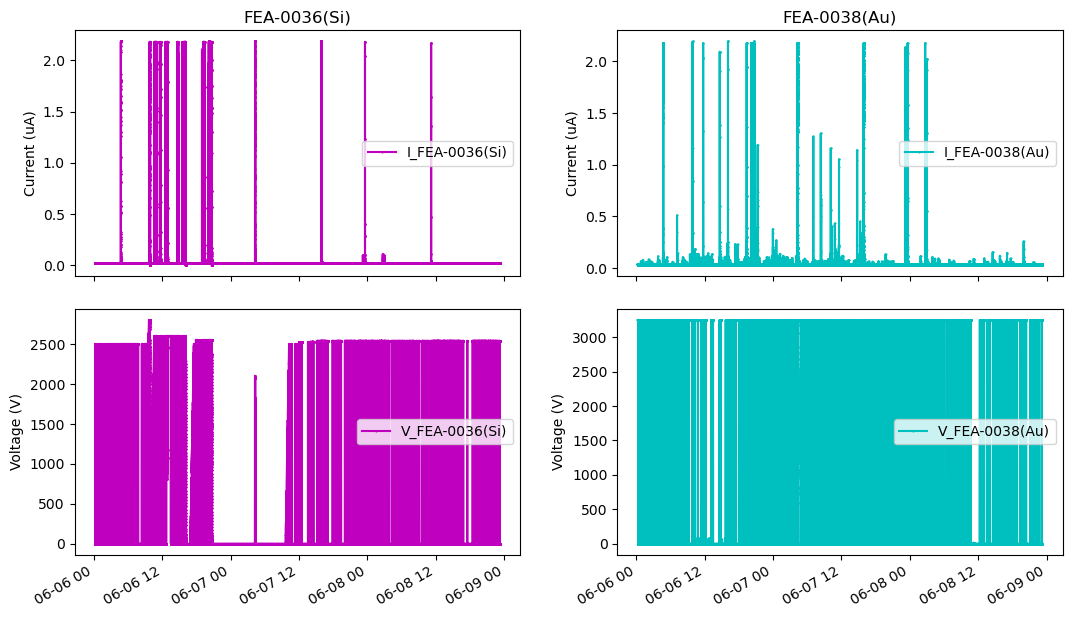

In [39]:
#plt.subplots(2,1, sharex='col')

plt.figure(figsize = [11,7])

plt.subplot(2,2,1)
plt.title(f"{FEA1}")
plt.ylabel('Current (uA)')
plt.plot_date(df_0.date[0:], df_0.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.title(f"{FEA2}")
plt.ylabel('Current (uA)')
plt.plot_date(df_2.date[0:], df_2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.ylabel('Voltage (V)')
plt.plot_date(df_0.date[0:], df_0.VMon[0:],'.-',color='m',label='V_'+FEA1, markersize=1)
#plt.yscale("log")
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.ylabel('Voltage (V)')
plt.plot_date(df_2.date[0:], df_2.VMon[0:],'.-',color='c',label='V_'+FEA2, markersize=1)
#plt.yscale("log")
plt.legend(loc='best')

#plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()

# directory = '/home/caio/remote/graphs/FEA_0036-0038'
# filename = 'after_new-HV'
# path = os.path.join(directory, filename)

# plt.savefig(path, dpi=200, transparent = True)

# plt.show()


# first FEA run

In [10]:
caenlogfolder = '/home/caio/data/2308_firstFEA/'
fcaen1 = caenlogfolder + 'CAENGECO2020_20230707_20230809.log'
fcaen2 = caenlogfolder + 'CAENGECO2020_20230821_20230825.log'

In [11]:
# this step takes time, be patient
df1 = get_HV_df([fcaen1])
df2 = get_HV_df([fcaen2])


#print(df1.iloc[1:,])
# print(df1.sort_values(by="date").tail())
# print(df2.sort_values(by="date").tail())
# print(df3.sort_values(by="date").tail())

df_unsorted = pd.concat([df1.iloc[:-2,], df2.iloc[:-2,]])

df = df_unsorted.sort_values(by='date').iloc[:-8,]

print(df.iloc[:-8,].tail())
print(df.head())

df1 = df.query("channel==2")
df2 = df.query("channel==3")

The number of empty line in /home/caio/data/2308_firstFEA/CAENGECO2020_20230707_20230809.log is 0
The number of empty line in /home/caio/data/2308_firstFEA/CAENGECO2020_20230821_20230825.log is 0
                      date  channel    IMon  VMon  Pw  ChStatus  IMonRange
323220 2023-08-25 12:28:07        2 -0.0040  1.50   1       1.0          0
323221 2023-08-25 12:28:10        2 -0.0040  1.45   1       1.0          0
646451 2023-08-25 12:28:10        3  0.0032  2.15   0       0.0          0
323222 2023-08-25 12:28:11        2 -0.0040  1.40   1       1.0          0
646452 2023-08-25 12:28:11        3  0.0032  2.15   0       0.0          0
                      date  channel    IMon  VMon  Pw  ChStatus  IMonRange
436926 2023-07-07 16:17:01        3  0.0022  0.00   0       0.0          0
1      2023-07-07 16:17:01        2  0.0000  0.00   0       0.0          0
2      2023-07-07 16:17:28        2  0.0000  0.00   0       0.0          0
436927 2023-07-07 16:17:28        3  0.0023  0.00   0 

In [12]:
df2

,date,channel,IMon,VMon,Pw,ChStatus,IMonRange
436926,2023-07-07 16:17:01,3,0.0022,0.00,0,0.0,0
436927,2023-07-07 16:17:28,3,0.0023,0.00,0,0.0,0
436928,2023-07-07 16:17:38,3,0.0023,2.15,0,0.0,0
436929,2023-07-07 16:17:40,3,0.0022,2.15,0,0.0,0
436930,2023-07-07 16:17:44,3,0.0021,2.15,0,0.0,0
...,...,...,...,...,...,...,...
646452,2023-08-25 12:28:11,3,0.0032,2.15,0,0.0,0
646453,2023-08-25 12:28:13,3,0.0032,2.15,0,0.0,0
646454,2023-08-25 12:28:15,3,0.0031,2.15,0,0.0,0
646455,2023-08-25 12:28:17,3,0.0031,2.15,0,0.0,0


/tmp/ipykernel_5921/3064094368.py:5: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax1.plot_date(df1.date[0:], df1.VMon[0:],'.-',color='blue',  label='V_'+FEA, markersize=1)
/tmp/ipykernel_5921/3064094368.py:6: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax2.plot_date(df2.date[0:], df2.VMon[0:],'.-',color='red', label='V_'+FEA, markersize=1)


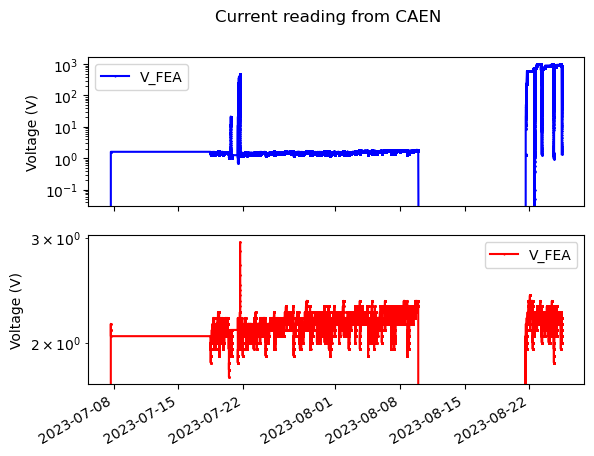

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1)

FEA = 'FEA'

ax1.plot_date(df1.date[0:], df1.VMon[0:],'.-',color='blue',  label='V_'+FEA, markersize=1)
ax2.plot_date(df2.date[0:], df2.VMon[0:],'.-',color='red', label='V_'+FEA, markersize=1)

fig.suptitle("Current reading from CAEN")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('Voltage (V)')
ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
#ax2.set_ylim(300)
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

/tmp/ipykernel_5921/1690761850.py:3: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax3.plot_date(df1.date[0:], df1.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA, markersize=1)
/tmp/ipykernel_5921/1690761850.py:4: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax4.plot_date(df2.date[0:], df2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA, markersize=1)


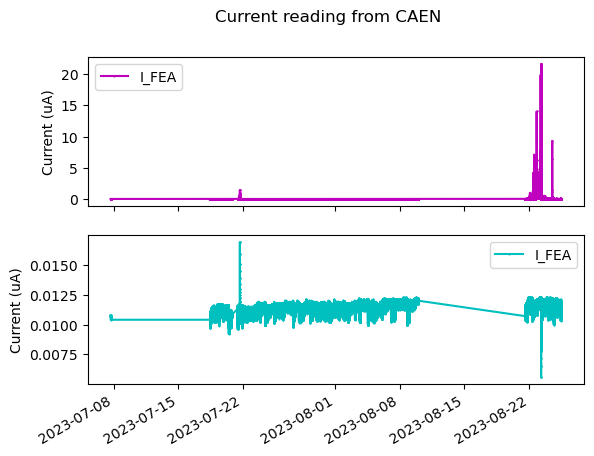

In [14]:
fig, (ax3, ax4) = plt.subplots(2,1, sharex='col')

ax3.plot_date(df1.date[0:], df1.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA, markersize=1)
ax4.plot_date(df2.date[0:], df2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA, markersize=1)

fig.suptitle("Current reading from CAEN")
#ax3.set_title("Subplot title")
ax3.set_ylabel('Current (uA)')
ax4.set_ylabel('Current (uA)')
#ax3.set_yscale('log')
#ax4.set_yscale('log')
#ax3.set_ylim(1e-3, 1e-1)
#ax4.set_ylim(1e-4, 1e-1)
ax3.legend()
ax4.legend()

plt.gcf().autofmt_xdate()

In [24]:
d1 = datetime(2023, 8, 21, 14, 43, 14)
d2 = datetime(2023, 8, 21, 18, 0, 29)
df_f = filter_date(df,d1,d2)

df_0 = df_f.query("channel==2")
df_2 = df_f.query("channel==3")

/tmp/ipykernel_5921/3331655150.py:3: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax4.plot_date(df_0.date[0:], df_0.IMon[0:],'.-', color='m',label="I_"+FEA, markersize=1)
/tmp/ipykernel_5921/3331655150.py:4: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax3.plot_date(df_0.date[0:], df_0.VMon[0:],'.-',color='c',label='I_'+FEA, markersize=1)


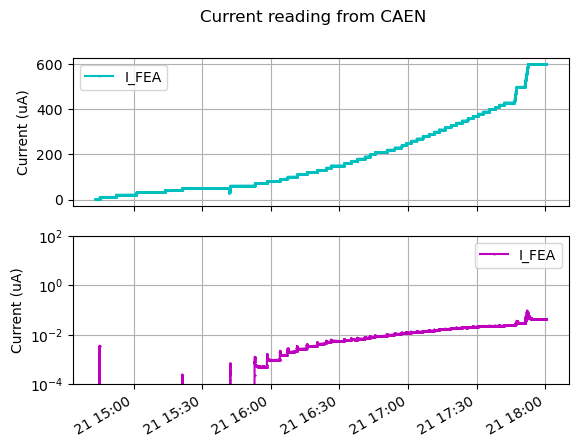

In [25]:
fig, (ax3, ax4) = plt.subplots(2,1, sharex='col')

ax4.plot_date(df_0.date[0:], df_0.IMon[0:],'.-', color='m',label="I_"+FEA, markersize=1)
ax3.plot_date(df_0.date[0:], df_0.VMon[0:],'.-',color='c',label='I_'+FEA, markersize=1)

fig.suptitle("Current reading from CAEN")
#ax3.set_title("Subplot title")
ax3.set_ylabel('Current (uA)')
ax4.set_ylabel('Current (uA)')
#ax3.set_yscale('log')
ax4.set_yscale('log')
#ax3.set_ylim(1e-4, 100)
ax4.set_ylim(1e-4, 100)
ax3.grid()
ax4.grid()
ax3.legend()
ax4.legend()

plt.gcf().autofmt_xdate()

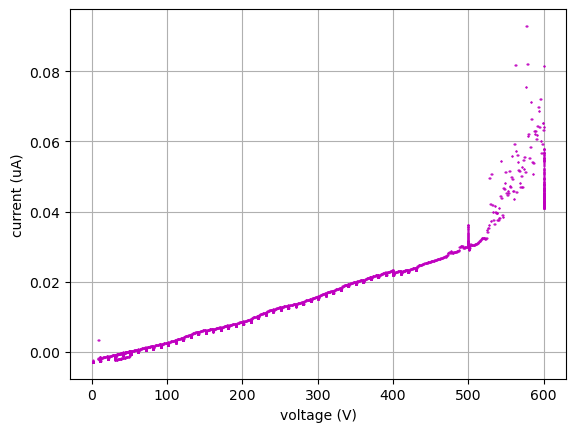

In [26]:
plt.plot(df_0.VMon[0:], df_0.IMon[0:],'.', color='m',label="I_"+FEA, markersize=1)
plt.xlabel('voltage (V)')
plt.ylabel('current (uA)')
plt.grid()
#plt.xlim([600, 1000])